<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

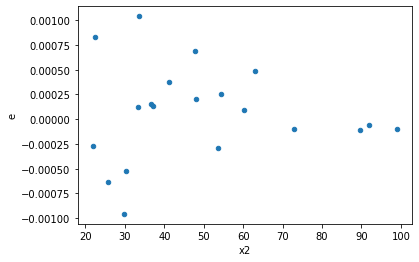

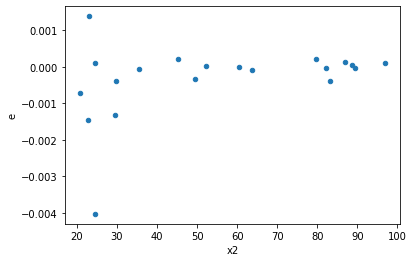

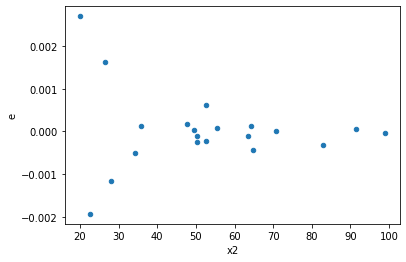

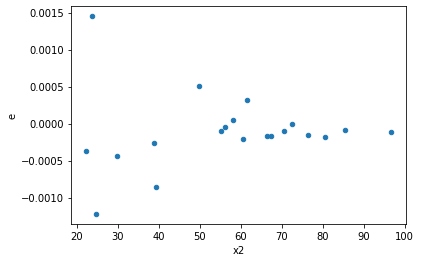

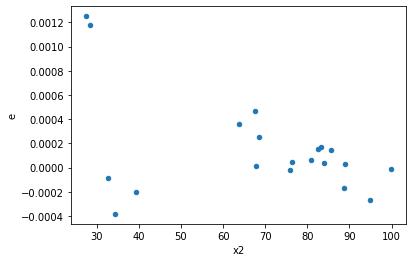

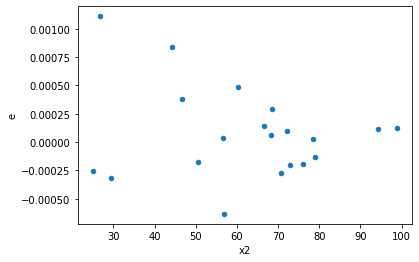

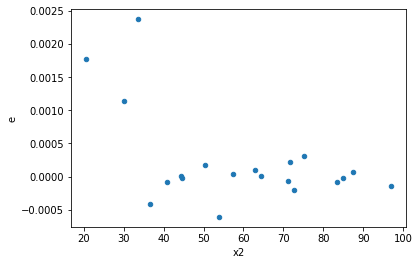

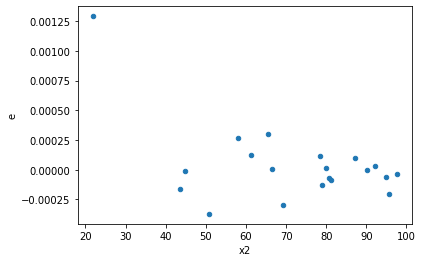

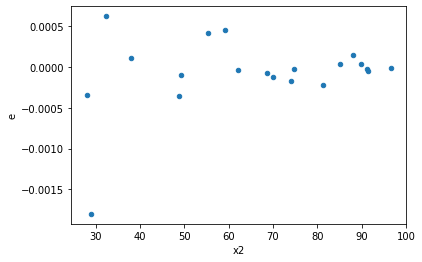

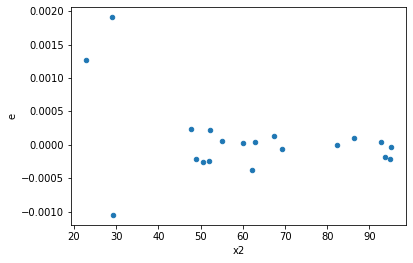

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,5.0,5.0,4.5634858109365397e-07,1.633443626239615e-06,9.12697162187308e-08,3.26688725247923e-07,3.5793770243023766,0.18794636067014237,0.9060268196649288,0.09397318033507118,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,3.1028661162683545e-07,3.908273429125425e-06,6.205732232536709e-08,7.81654685825085e-07,12.595688252981052,0.014703244823060624,0.9926483775884697,0.007351622411530312,Reject001=1 : Homoscedasticity
30.0,5.0,5.0,1.5380998535507035e-06,2.5372301305672074e-06,3.076199707101407e-07,5.074460261134415e-07,1.6495873949340882,0.5961888001227564,0.7019055999386218,0.2980944000613782,Reject001=1 : Homoscedasticity
32.0,5.0,5.0,1.1136414347093921e-07,2.0000051180730797e-07,2.2272828694187842e-08,4.0000102361461596e-08,1.7959147852602906,0.5360693114587476,0.7319653442706262,0.2680346557293738,Reject001=1 : Homoscedasticity
38.0,5.0,5.0,4.876176059618359e-07,7.287972282523857e-07,9.752352119236718e-08,1.4575944565047713e-07,1.4946081095960797,0.6699817280259848,0.6650091359870076,0.3349908640129924,Reject001=1 : Homoscedasticity
43.0,5.0,5.0,5.272482708495695e-07,6.984770041507807e-07,1.0544965416991389e-07,1.3969540083015614e-07,1.3247592126291958,0.7651522030595905,0.6174238984702047,0.38257610152979526,Reject001=1 : Homoscedasticity
44.0,5.0,5.0,3.296219401890576e-07,2.423746224637036e-06,6.592438803781152e-08,4.847492449274072e-07,7.353109514636297,0.047130496119846876,0.9764347519400766,0.023565248059923438,Reject001=1 : Homoscedasticity
45.0,5.0,5.0,1.7248417777874317e-07,3.458630096026481e-07,3.449683555574863e-08,6.917260192052963e-08,2.0051868760177496,0.46338664417603437,0.7683066779119828,0.23169332208801718,Reject001=1 : Homoscedasticity
60.0,5.0,5.0,1.3223277288481697e-06,3.4551054734806302e-06,2.6446554576963396e-07,6.910210946961261e-07,2.612896484058641,0.31532812278879274,0.8423359386056036,0.15766406139439637,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.092390887882035e-06,2.267541303295692e-07,2.1847817757640702e-07,4.535082606591384e-08,0.20757599943844998,0.10942812628170141,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,7.947085101112943e-06,1.6952255373467066e-06,1.5894170202225887e-06,3.390451074693413e-07,0.21331412911500092,0.11521853338299534,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,1.1277091106048059e-05,1.467976570497529e-07,2.255418221209612e-06,2.935953140995058e-08,0.01301733360751367,0.00020057926008232958,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,4.2638358720252857e-07,1.2949880912962569e-08,8.527671744050571e-08,2.5899761825925136e-09,0.03037143384886315,0.001569827939649154,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,1.073506770772289e-06,7.180053108660105e-08,2.147013541544578e-07,1.4360106217320209e-08,0.06688409709325559,0.00998229093580425,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,1.560089066426905e-06,4.6048123709328426e-07,3.1201781328538104e-07,9.209624741865685e-08,0.29516342816755403,0.20662074832694802,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1.0336124253629585e-06,3.2715201352962324e-07,2.067224850725917e-07,6.543040270592464e-08,0.3165132360079186,0.23244662397456722,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.6112779032957696e-07,2.28465438105979e-07,5.2225558065915395e-08,4.56930876211958e-08,0.8749181303821633,0.8869959437048319,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,4.5634858109365397e-07,1.633443626239615e-06,9.12697162187308e-08,3.26688725247923e-07,3.5793770243023766,0.18794636067014237,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      668
Reject001=0 : Heteroscedasticity    332
Name: Result_test, dtype: int64